In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import numpy as np 


In [5]:
df= pd.read_csv("Sample - Superstore1.csv")

In [9]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [57]:
quantity= round(df['Quantity'].sum(),2)
print ("Total Quantity=", quantity)

profit= int(df['Profit'].sum(),)
print ("Total Profit=", profit)

sales= int(df['Sales'].sum(),)
print ("Total Sales=", sales)

profit_margin= round((profit/sales)*100,2)
print("Profit Margin=", profit_margin)

Total Quantity= 37873
Total Profit= 286396
Total Sales= 2297200
Profit Margin= 12.47


In [187]:
print("=========KPIs=========")
print(f"Total Quantity: {quantity:,.0f}")
print(f"Total Sales: {sales:,.0f}")
print(f"Total Profit: {profit:,.0f}")
print(f"Profit Margin: {profit_margin}%")
print("======================")

=========KPIs=========
Total Quantity: 37,873
Total Sales: 2,297,200
Total Profit: 286,396
Profit Margin: 0.12%


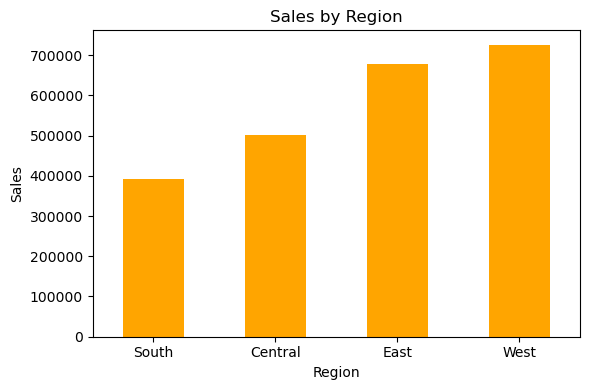

In [89]:
sales_by_region= df.groupby('Region')['Sales'].sum().sort_values()
plt.figure(figsize=(6,4))
sales_by_region.plot(kind="bar",color="orange")
plt.title("Sales by Region")
plt.xlabel("Region")
plt.xticks(rotation=0)
plt.ylabel("Sales")
plt.tight_layout()
plt.show()

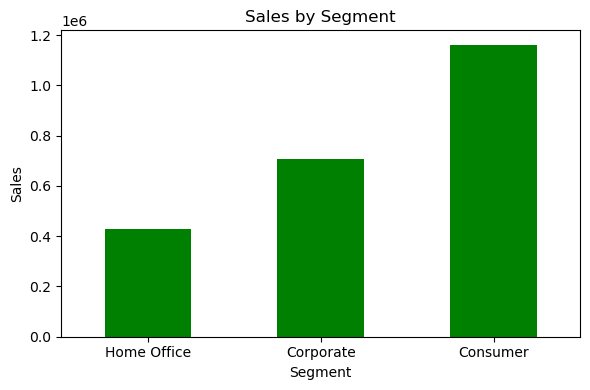

In [130]:
sales_by_region= df.groupby('Segment')['Sales'].sum().sort_values()
plt.figure(figsize=(6,4))
sales_by_region.plot(kind="bar",color="green")
plt.title("Sales by Segment")
plt.xlabel("Segment")
plt.xticks(rotation=0)
plt.ylabel("Sales")
plt.tight_layout()
plt.show()

Donut Chart Sales by Category 

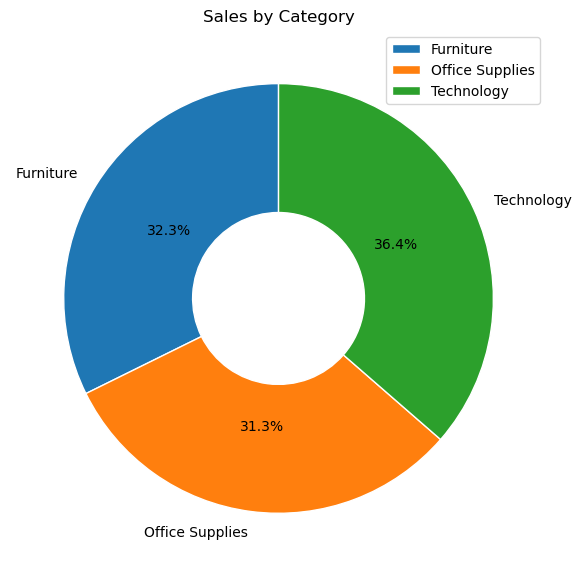

In [111]:
sales_by_category= df.groupby('Category')['Sales'].sum()
sales_by_category.plot.pie(
    autopct='%1.1f%%',      # Show percentage with 1 decimal
    startangle=90,          # Start from top (optional: 0, 90, 180)
    figsize=(6, 6),         # Size of chart

    legend=True,            # Optional: show legend
    label='',               # Removes the big label in center
    wedgeprops={'width': 0.6, 'edgecolor': 'white'}

)
plt.title("Sales by Category")
plt.ylabel("")
plt.tight_layout()
plt.show()

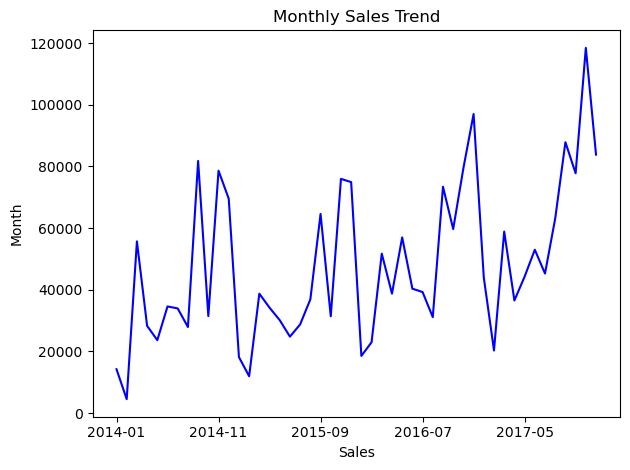

In [120]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Month']= df['Order Date'].dt.to_period('M').astype(str)
monthly_sales_trend= df.groupby('Month')['Sales'].sum()
monthly_sales_trend.plot(kind="line",color="blue")
plt.title("Monthly Sales Trend")
plt.xlabel('Sales')
plt.ylabel('Month')
plt.tight_layout()
plt.show()

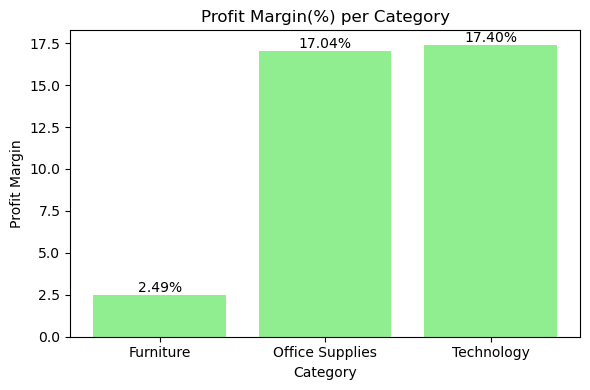

In [171]:

profit_category= (df.groupby('Category')['Profit'].sum()/ df.groupby('Category')['Sales'].sum())*100
plt.figure(figsize=(6,4))

bars = plt.bar(profit_category.index, profit_category.values, color="lightgreen")

plt.title("Profit Margin(%) per Category")
plt.xlabel("Category")
plt.xticks(rotation=0)
plt.ylabel("Profit Margin")

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{height:.2f}%', ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()